# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pose import *
import warnings
warnings.filterwarnings('ignore') # Suppressing warnings

# Running main

In [2]:
reps = {}
main(reps)

# Saving relevant values as lists

In [45]:
rep_no = list(range(1, reps['count']+1))

time = list(reps['time'].values())[:reps['count']]
time = [round(x,1) for x in time] # Rounding values to single decimal point
time_label = [f'{str(x)}s' for x in time]

correct_form = list(reps['correct_form'].values())[:reps['count']]
correct_form = [round(x,1) for x in correct_form]
correct_form_label = [f'{str(x)}s' for x in correct_form]

wrong_form = list(reps['wrong_form'].values())[:reps['count']]
wrong_form = [round(x,1) for x in wrong_form]
wrong_form_label = [f'{str(x)}s' for x in wrong_form]

# Storing lists in a pandas dataframe

In [4]:
data = [rep_no, time, correct_form, wrong_form]
columns = ['rep_no', 'time', 'correct_form', 'wrong_form']

In [5]:
data = pd.DataFrame(data, columns).transpose()

In [6]:
data

,rep_no,time,correct_form,wrong_form
0,1.0,2.4,0.2,2.2
1,2.0,1.9,0.8,1.2
2,3.0,5.0,3.8,1.2
3,4.0,2.0,1.5,0.5
4,5.0,4.1,3.3,0.8
5,6.0,2.2,1.8,0.4
6,7.0,1.5,1.5,0.0
7,8.0,1.8,1.4,0.3
8,9.0,1.9,1.8,0.1
9,10.0,1.9,1.9,0.0


# Time vs. Reps plot using seaborn

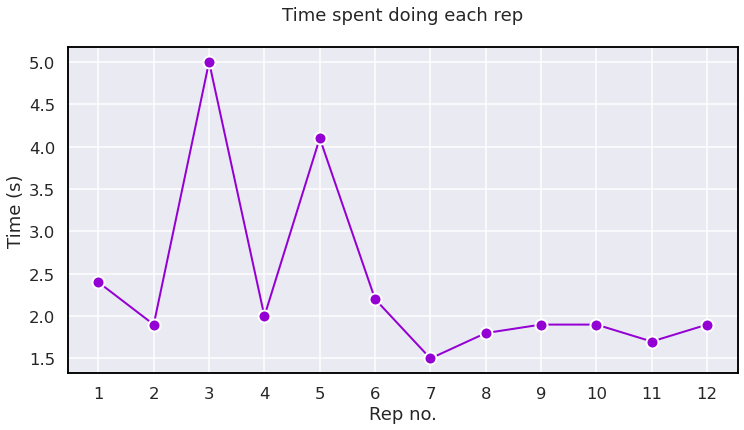

In [7]:
figure = plt.figure(figsize=(12, 6))

sns.set_style('darkgrid', {'axes.edgecolor': 'black'})
sns.set_context('talk')
sns.lineplot(data=data, x='rep_no', y='time',
             color='darkviolet', lw=2,
            marker='o', ms=12, mec='white', mew=2
            )

plt.xticks(rep_no)
plt.xlabel('Rep no.')
plt.ylabel('Time (s)')
plt.title("Time spent doing each rep\n")

plt.show()

In [8]:
# sns.axes_style()

# X and Y axis settings

In [9]:
xaxis=dict(showline=True,
           linewidth=2,
           linecolor='black',
           mirror=True, # To create border outline
           dtick=1) # Setting x ticks to show each rep count

yaxis=dict(showline=True,
           linewidth=2,
           linecolor='black',
           mirror=True)

# Time vs. Reps iplot using plotly

In [51]:
fig1= go.Figure()

fig1.add_trace(go.Scatter(x=data['rep_no'],
                         y=data['time'],
                         text=time_label,
                         hoverinfo='text',
                         line=dict(color='darkviolet',
                                   width=3),
                         stackgroup='one' # To fill color beneath the plotted area
                        ))

fig1.update_layout(title='Time spent doing each rep',
                  xaxis_title='Rep no.',
                  yaxis_title='Time (s)',
                  xaxis=xaxis,
                  yaxis=yaxis,
                  plot_bgcolor='#EAEAF2',
                  font_size=15
                 )

fig1.show()

# Time vs. Reps iplot comparing correct form to wrong form

In [50]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    name='Wrong form',
    x=rep_no,
    y=wrong_form,
    text=wrong_form_label,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=3,
              color='red'),
    stackgroup='one'
))

fig2.add_trace(go.Scatter(
    name='Correct form',
    x=rep_no,
    y=correct_form,
    text=correct_form_label,
    hoverinfo='text',
    mode='lines',
    line=dict(width=3,
              color='rgb(111, 231, 219)'),
    stackgroup='one'
))

fig2.update_layout(title='Correct form vs. Wrong form with rep progression',
                   xaxis_title='Rep no.',
                   yaxis_title='Time (s)',
                   xaxis=xaxis,
                   yaxis=yaxis,
                   plot_bgcolor='#EAEAF2',
                   font_size=15
                  )

fig2.show()

# Barplot comparing cumulative time spent doing correct and wrong form

In [41]:
total_correct =round(sum(correct_form), 1)
total_wrong = round(sum(wrong_form), 1)

y_bar = [total_correct, total_wrong]
text_label = [f'{str(x)}s' for x in y_bar]
x_bar = ['Correct form', 'Wrong form']

form_colors = ['rgba(111, 231, 219, 0.5)', 'rgba(255,0,0,0.5)'] # Using rgba to set different opacity for marker and marker line
form_line_colors = ['rgba(111, 231, 219, 1)', 'rgba(255,0,0,1)']

In [42]:
fig3 = go.Figure([go.Bar(x=x_bar, 
                         y=y_bar,
                         text=text_label, 
                         hoverinfo='x+text',
                         textposition='outside',
                         marker=dict(color=form_colors,
                                     line=dict(color=form_line_colors,
                                               width=3))
                        )])

fig3.update_layout(title='Correct form vs. Wrong form (Cumulative)',
                   yaxis_title='Time (s)',
                   plot_bgcolor='#EAEAF2',
                   font_size=15
                  )

fig3.show()

# Pie chart comparing cumulative time spent doing correct and wrong form

In [43]:
fig4 = go.Figure(data=[go.Pie(labels=x_bar,
                              values=y_bar)])

fig4.update_traces(hoverinfo='label+percent', 
                   text=text_label,
                   textinfo='text', 
                   textfont_size=20,
                   marker=dict(colors=form_colors, 
                               line=dict(color=form_line_colors, 
                                         width=3))
                  )

fig4.show()